In [1]:
# Detection + Recogntion (KNN)

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = []
Y = []

d = {}
cnt = 0

# Training 

for f in os.listdir():
    if f.endswith(".npy"):
        imgs = np.load(f)
        X.append(imgs)
        labels = np.ones((imgs.shape[0]))*cnt
        Y.append(labels)
        
        d[cnt] = f[:-4]
        cnt += 1
        

In [20]:
d

{0: 'prateek', 1: 'aastha'}

In [18]:
X = np.array(X)
Y = np.array(Y)

X = X.reshape((20,100,100,3))
Y = Y.reshape((20,))

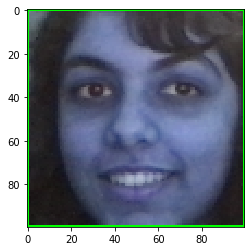

In [31]:

plt.imshow(X[18])
plt.show()

In [37]:

def dist(p1,p2):
    return np.sum((p1-p2)**2)**.5

def KNN(X,Y,test_point,k=5):
    
    d = []
    m = X.shape[0]
    #1 - Distance of test_point from all points
    for i in range(m):
        current_dist = dist(test_point,X[i])
        d.append((current_dist,Y[i]))
        
    # 2 - Sort 
    d = sorted(d)
    # 3 - Pick the first k points
    d = d[:k]

    # 4 - Create an numpy array 
    d = np.array(d)
    
    d = d[:,1]
    # 5 - Find out uniq classes and counts
    uniq,cnts = np.unique(d,return_counts=True)
    idx = np.argmax(cnts)
    # 6 -  Find the label with maximum cnt
    pred = uniq[idx]
    # Mapping indices to classname
    return int(pred)

In [38]:
# PRediction Part

camera = cv2.VideoCapture(0)
detector = cv2.CascadeClassifier("../Resources/haarcascade_frontalface_alt.xml")

In [42]:
while True:
    success,img = camera.read()
    if not success:
        continue
        
    faces = detector.detectMultiScale(img)
    if(len(faces)==0):
        continue
        
    for f in faces:
        x,y,w,h = f
        green = (0,255,0)
        cv2.rectangle(img,(x,y),(x+w,y+h),green,5)
        
        #Crop the face and resize it 
        crop_face = img[y:y+h,x:x+w]
        resized_face = cv2.resize(crop_face,(100,100))
        
        #Make Predictions
        predicted_label = KNN(X,Y,resized_face)
        predicted_name = d[predicted_label]
        
        cv2.putText(img,predicted_name,(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255))
        
    cv2.imshow("Image",img)
    key = cv2.waitKey(1)
    if key==ord('q'):
        break
        
camera.release()
cv2.destroyAllWindows()
